<a href="https://colab.research.google.com/github/BelongsToMe091603/Experience-MN/blob/main/Telco_Customer_Churn_Muhammad_Naufal_LSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mengumpulkan Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LSP/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Menelaah Data

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
# Ubah kolom TotalCharges menjadi numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

,0
customerID,7043
gender,4
SeniorCitizen,2
Partner,2
Dependents,2
tenure,78
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7040.000000,7043.000000,7032.000000
mean,0.162147,35.043892,64.761692,2283.300441
std,0.368612,115.282871,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,7100.000000,118.750000,8684.800000


In [ ]:
print("\nDistribusi nilai unik di setiap kolom")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

category_columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in category_columns:
    print(f"\nNIlai unik dikolom {col}:")
    print(df[col].unique())


Distribusi nilai unik di setiap kolom
customerID: 7043 unique values
gender: 4 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 78 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6530 unique values
Churn: 2 unique values

NIlai unik dikolom customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

NIlai unik dikolom gender:
['F' 'Male' 'Female' 'M' nan]

NIlai unik dikolom SeniorCitizen:
[0 1]

NIlai unik dikolom Partner:
['Yes' 'No']

NIlai unik dikolom Dependents:
['No' 'Yes']

NIlai unik dikolom PhoneServic

<Figure size 1200x800 with 0 Axes>

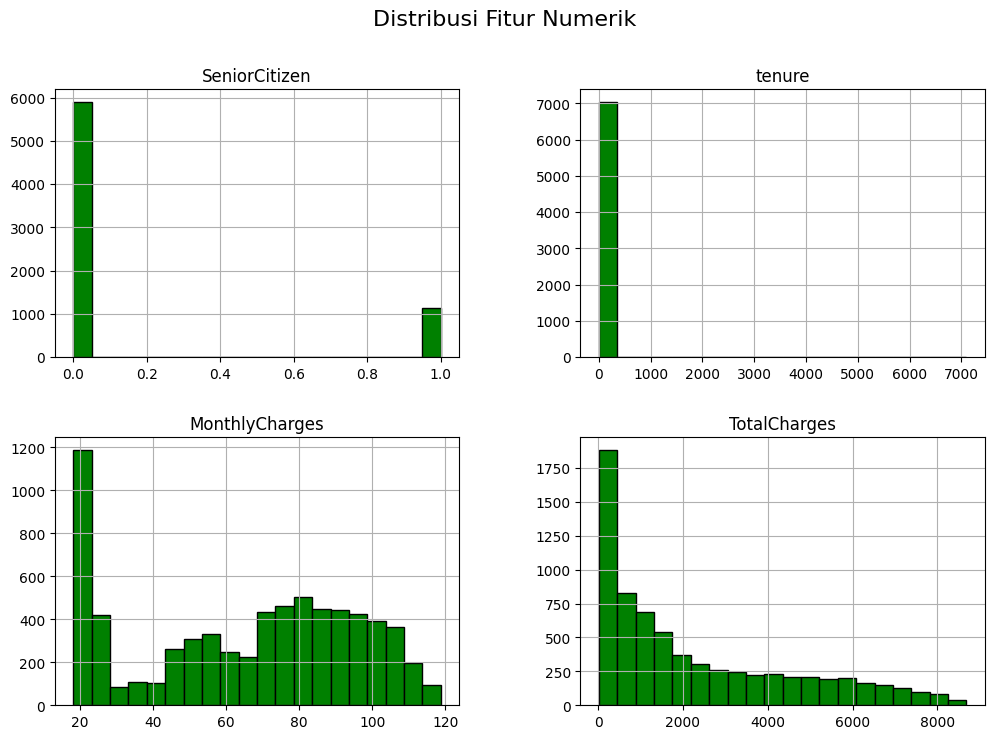

In [ ]:
# Plot histogram untuk fitur numerik
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 8))
df[num_cols].hist(bins=20, figsize=(12, 8), color='green', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()


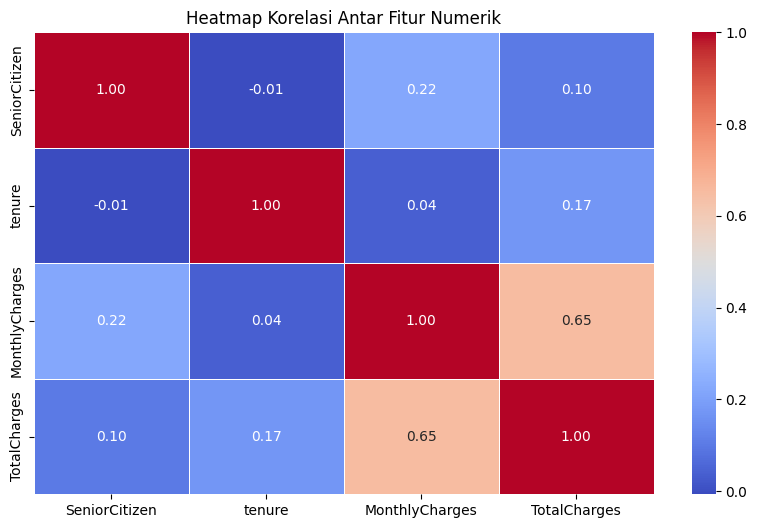

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

In [ ]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
print(df[num_cols].skew())

SeniorCitizen      1.833633
tenure            46.483009
MonthlyCharges    -0.220524
TotalCharges       0.961642
dtype: float64


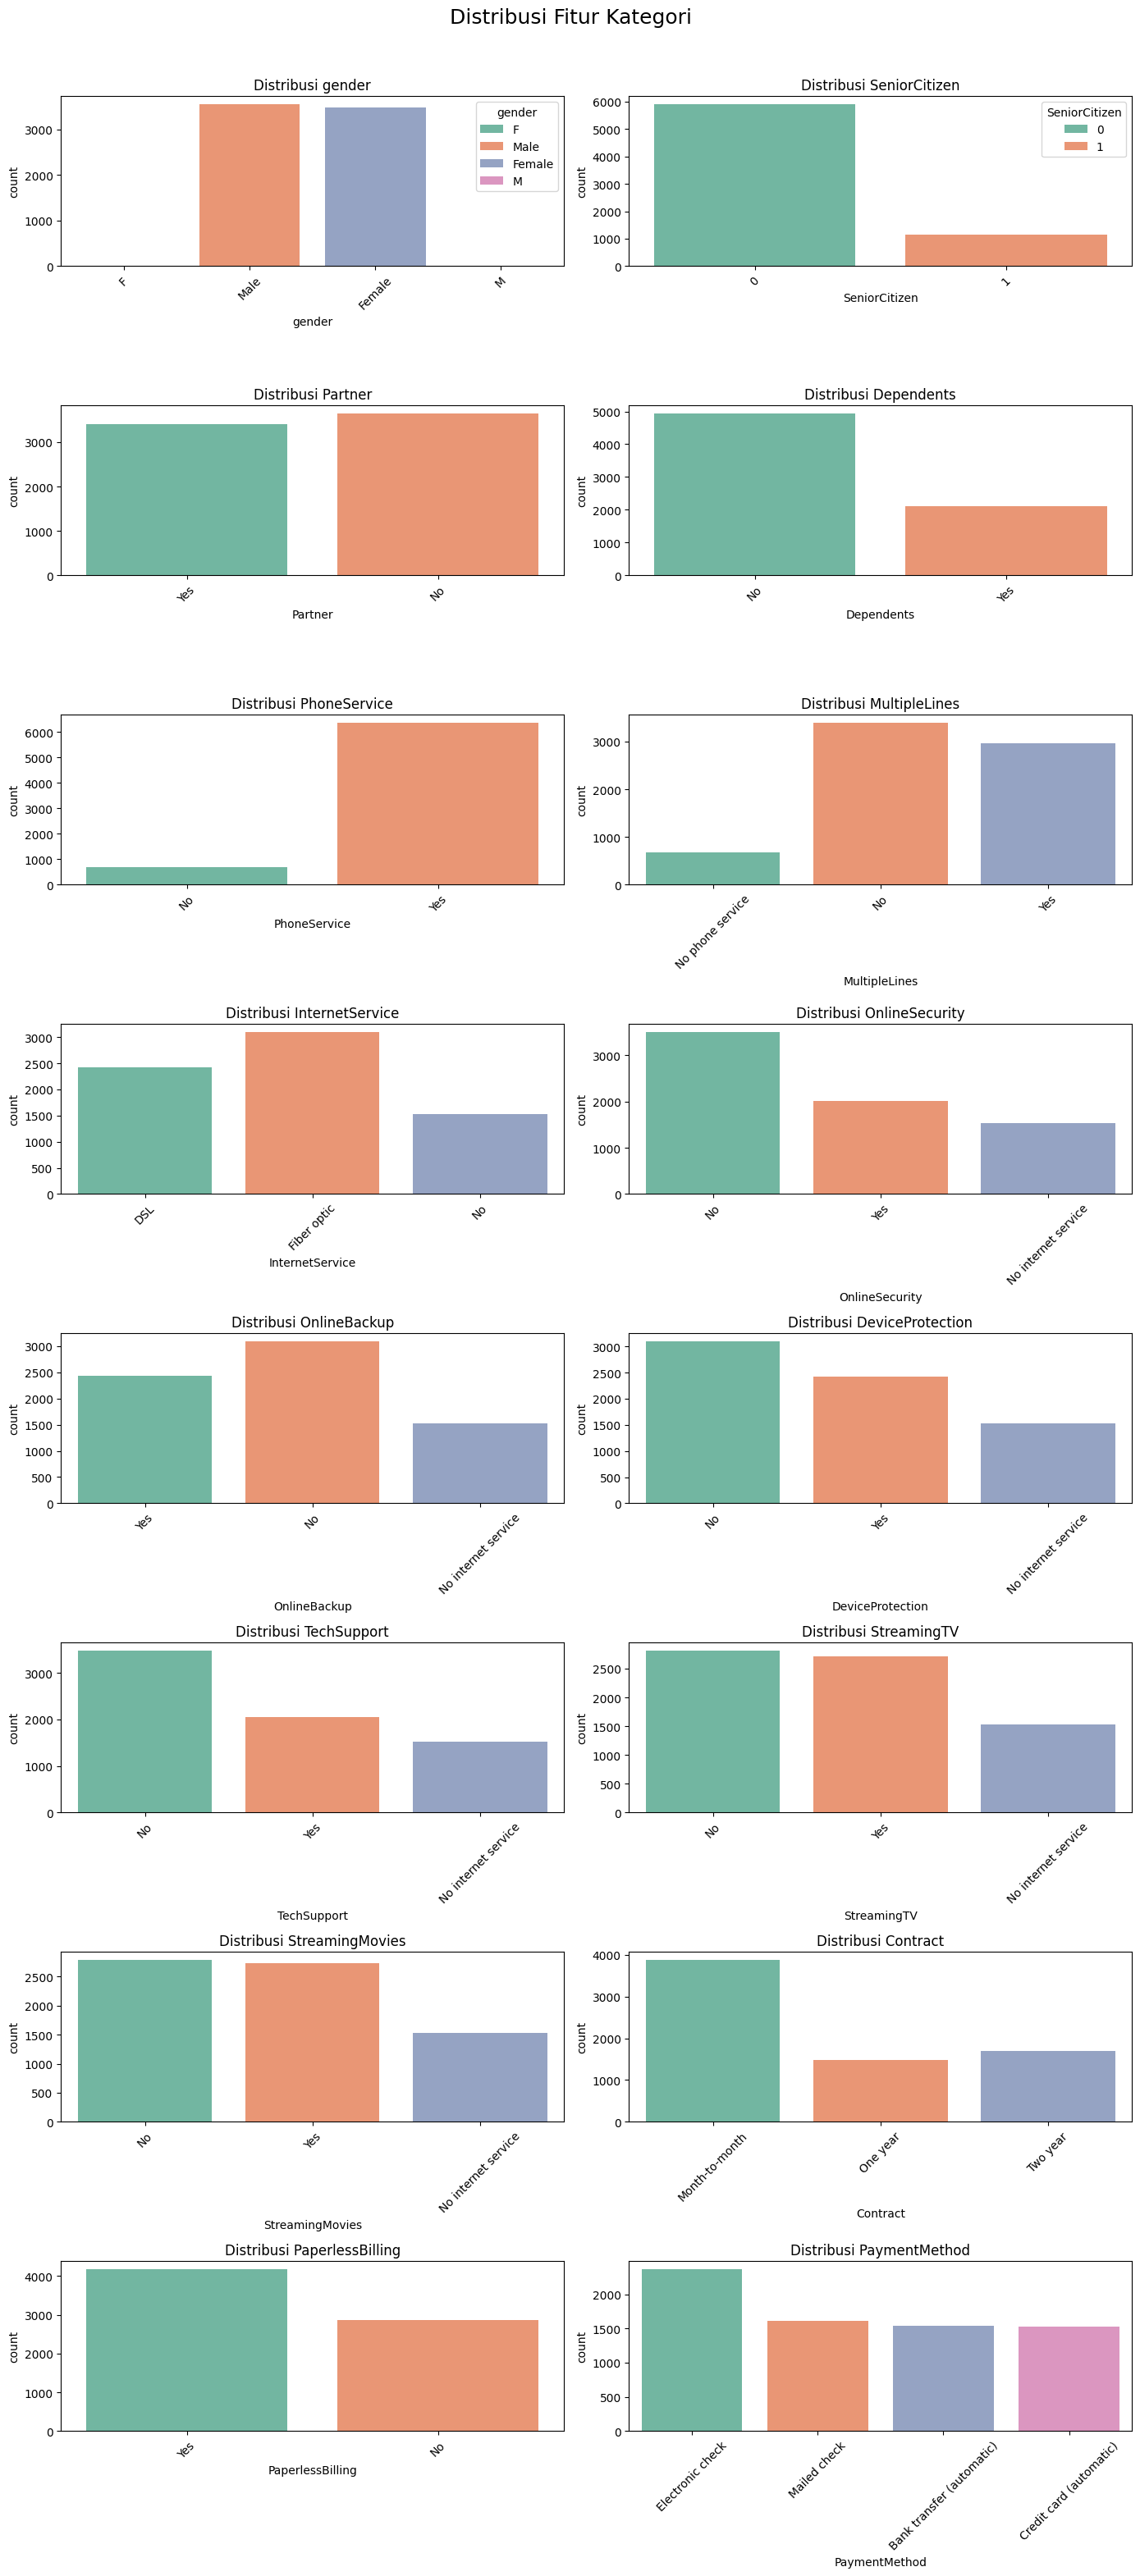

In [ ]:
import math

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

# Hitung jumlah baris dan kolom otomatis
n_cols = 2  # jumlah kolom grafik per baris
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(14, n_rows * 4))
plt.suptitle("Distribusi Fitur Kategori", fontsize=18)

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue=df[col], palette="Set2")
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # supaya title tidak ketimpa
plt.show()

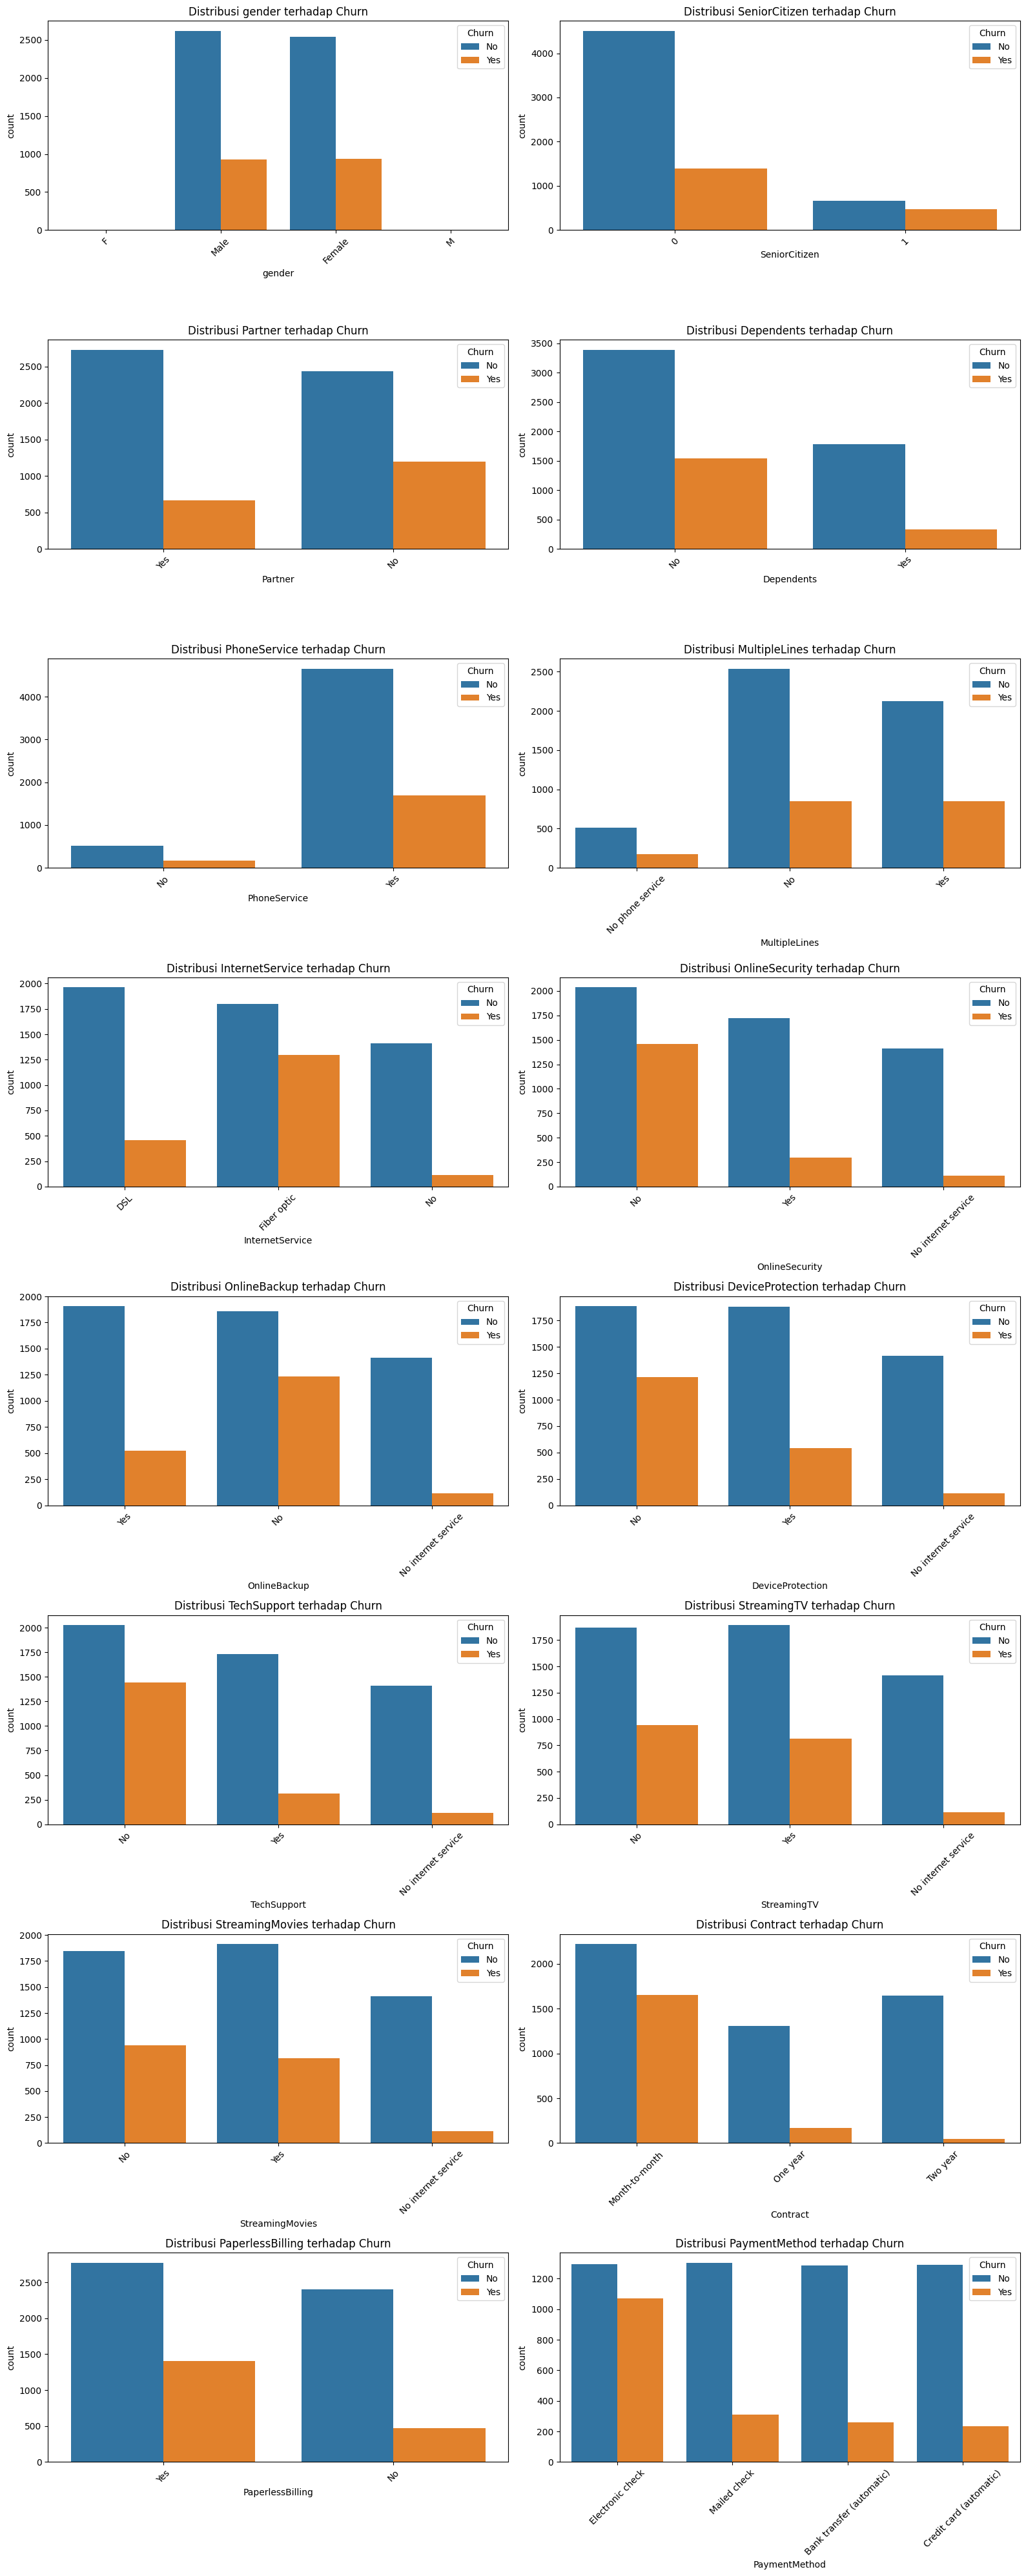

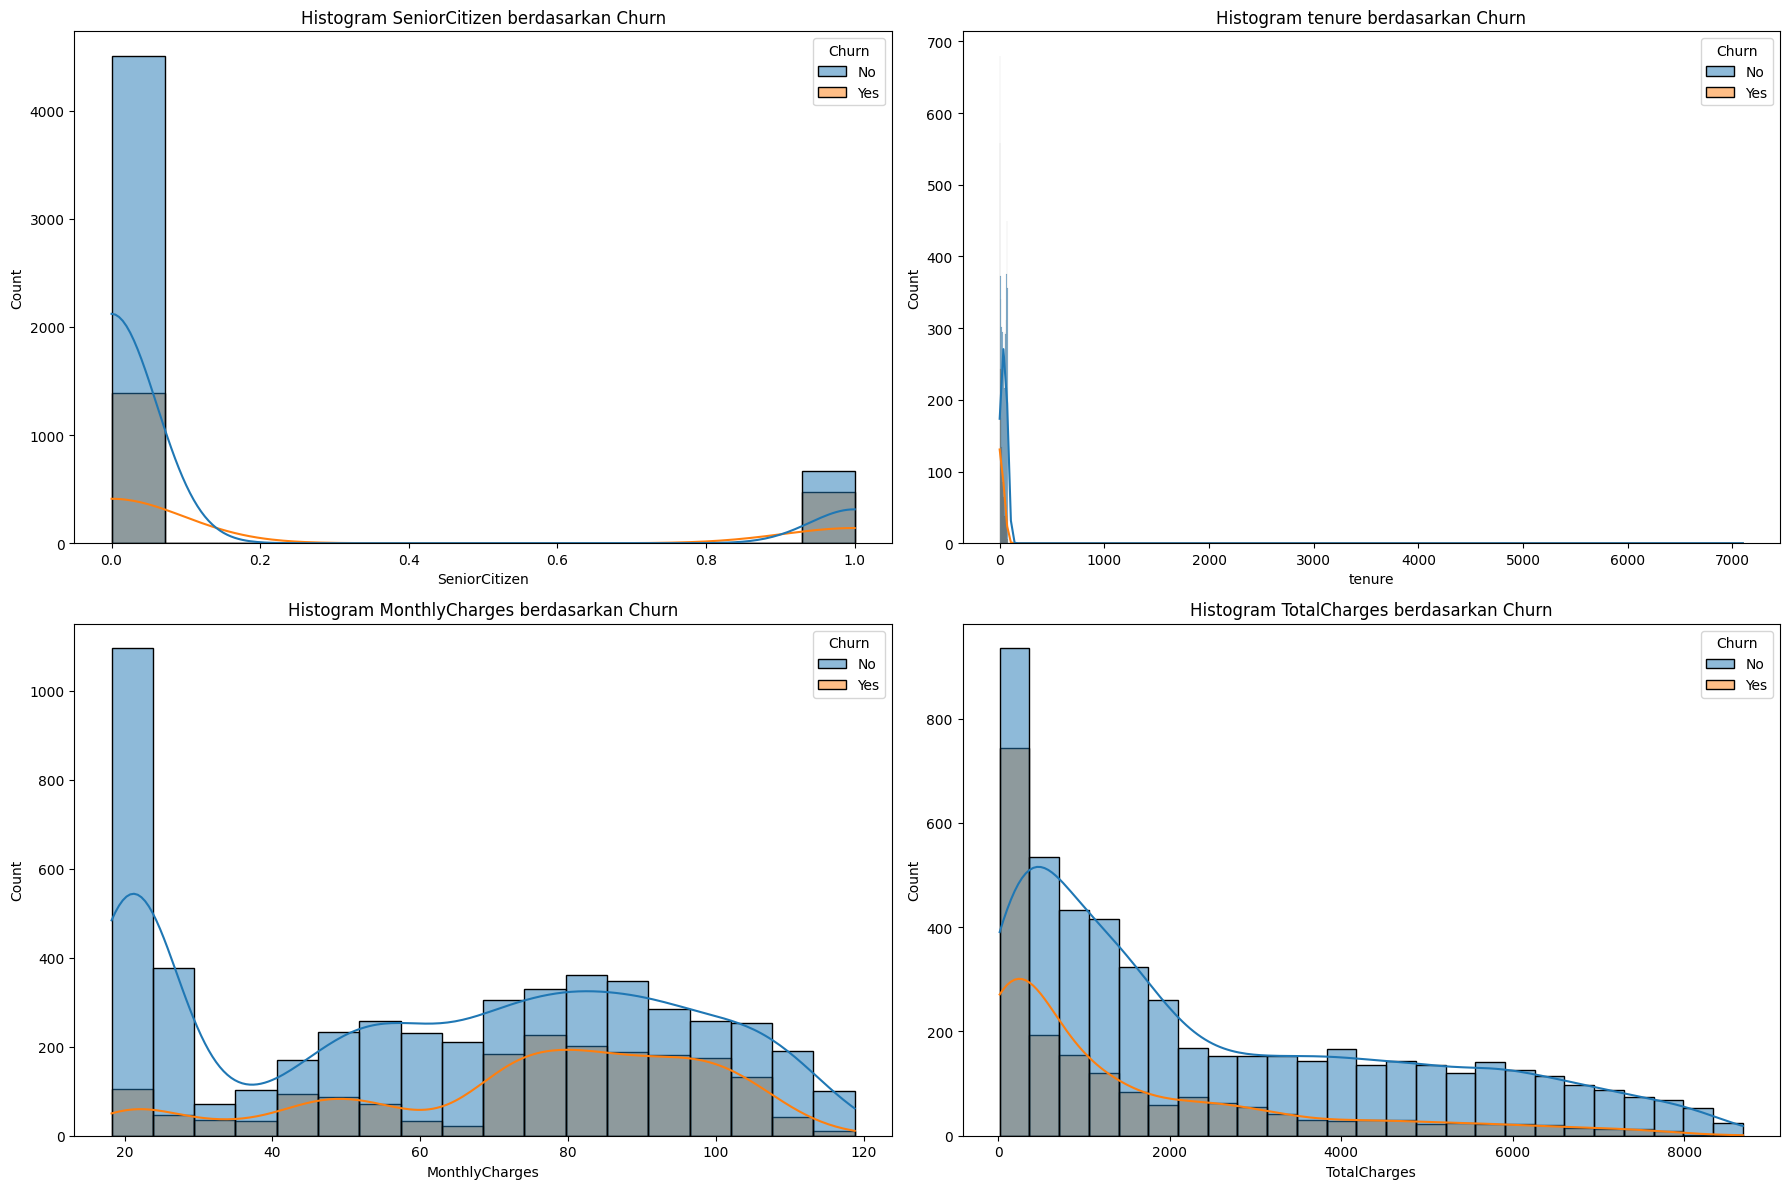

In [ ]:
plt.figure(figsize=(16, len(cat_cols) * 2.5))

n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"Distribusi {col} terhadap Churn")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue="Churn", kde=True)
    plt.title(f"Histogram {col} berdasarkan Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

In [ ]:
# plt.figure(figsize=(16, 20))

# for i, col in enumerate(cat_cols, 1):
#     plt.subplot(6, 3, i)  # 6 baris, 3 kolom
#     sns.countplot(data=df, x=col, hue='Churn')
#     plt.title(f"Distribusi {col} terhadap Churn")
#     plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(18, 12))
# plt.suptitle("Histogram Fitur Numerik Berdasarkan Churn", fontsize=18)

# for i, col in enumerate(num_cols, 1):
#     plt.subplot(2, 2, i)
#     sns.histplot(data=df, x=col, hue="Churn", kde=True)
#     plt.title(f"Distribusi {col} berdasarkan Churn")
#     plt.xlabel(col)
#     plt.ylabel("Jumlah")
#     plt.tight_layout()

# plt.show()

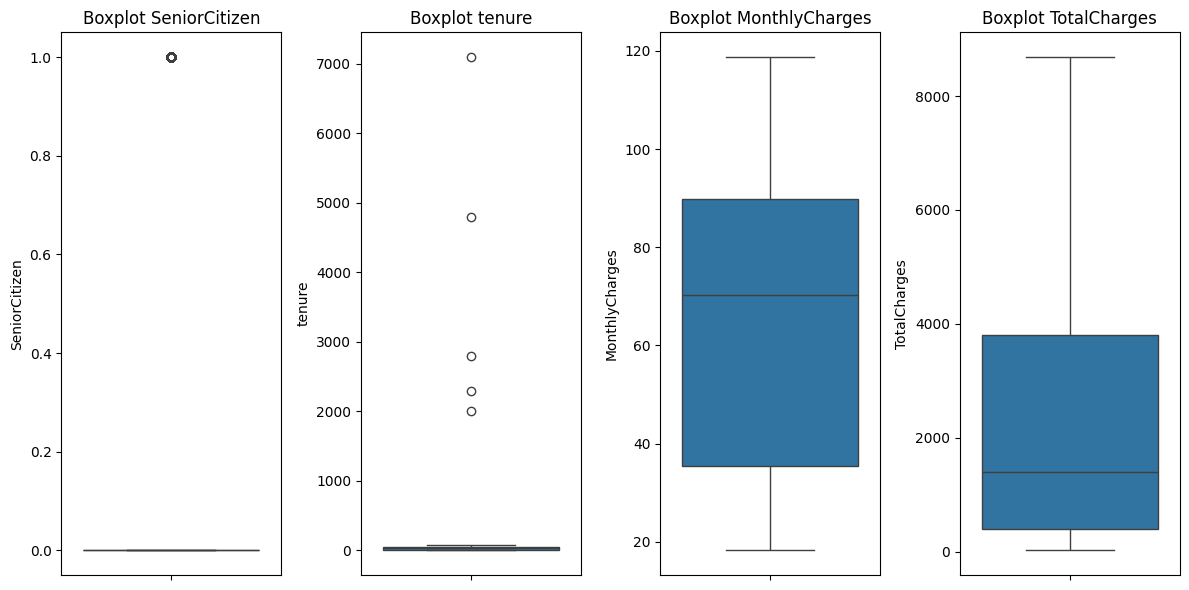

In [ ]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

In [ ]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Detecting outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))

# Tampilkan hasilnya sebagai DataFrame
# outlier_df = pd.DataFrame.from_dict(outlier_count, orient="index", columns=["Jumlah Outlier"])
print(outliers.sum())

SeniorCitizen     1142
tenure               5
MonthlyCharges       0
TotalCharges         0
dtype: int64


In [ ]:
from scipy.stats import zscore

df['SeniorCitizen'] = np.log1p(df['SeniorCitizen'])  # log1p digunakan agar log(0) tidak error
df['tenure'] = np.log1p(df['tenure'])  # log1p digunakan agar log(0) tidak error

# Detecting outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Count of outliers per column

SeniorCitizen     1142
tenure               5
MonthlyCharges       0
TotalCharges         0
dtype: int64


In [ ]:
print(df[num_cols].skew())

SeniorCitizen     1.833633
tenure           -0.710162
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64


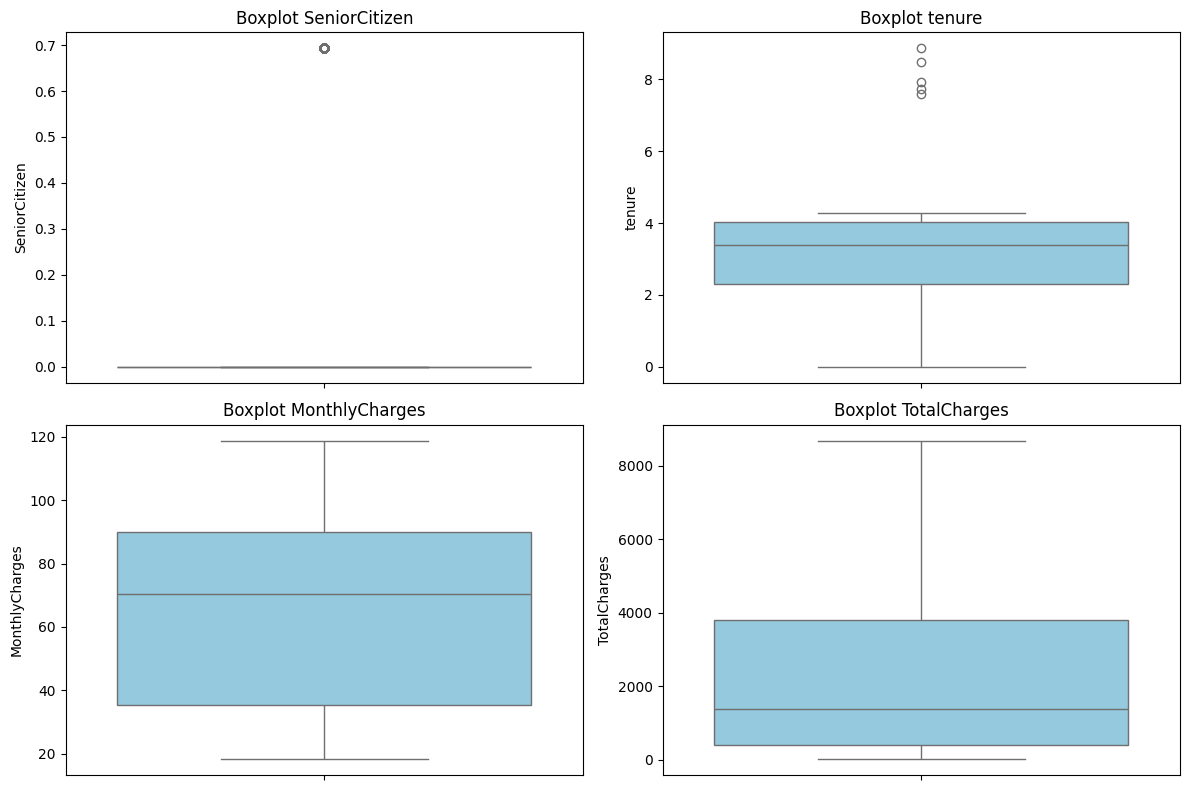

In [ ]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

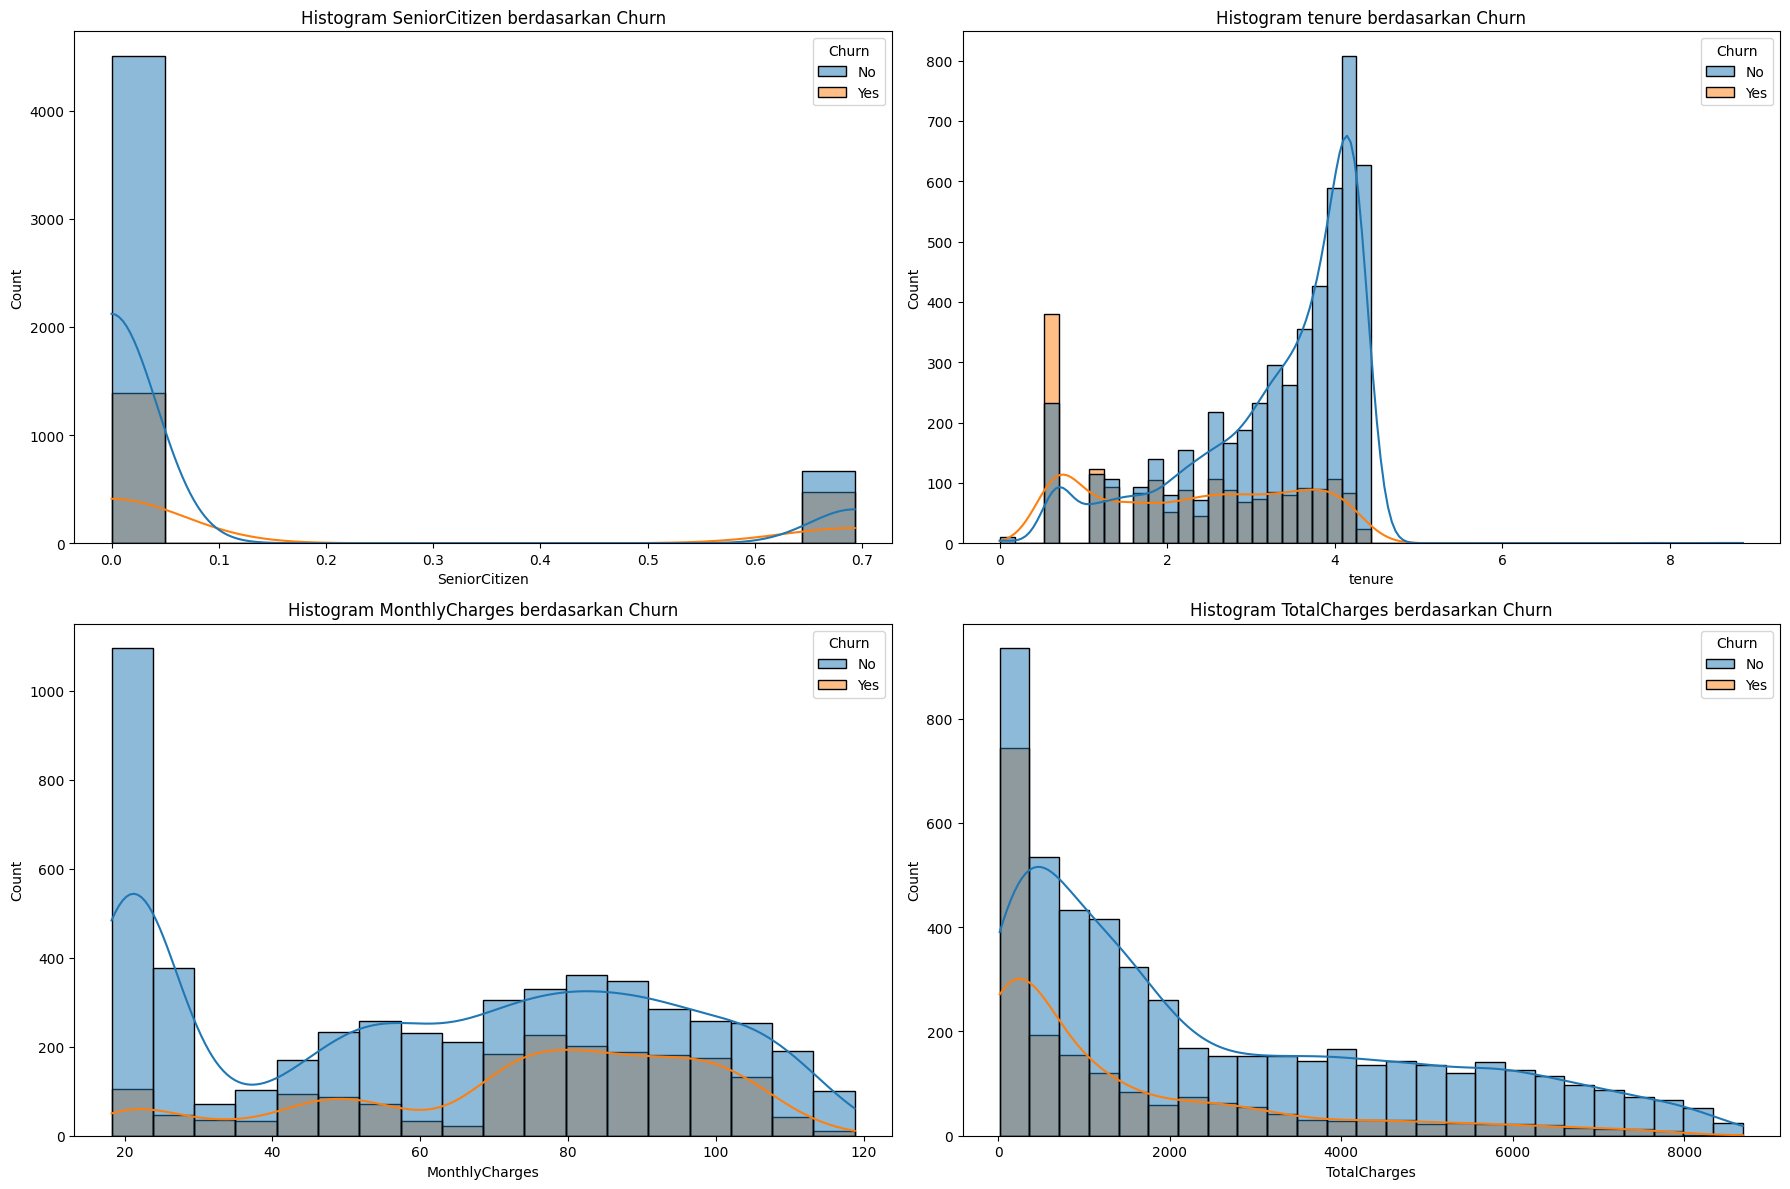

In [ ]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue="Churn", kde=True)
    plt.title(f"Histogram {col} berdasarkan Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

# Memvalidasi Data

In [ ]:
df.isnull().any()

,0
customerID,False
gender,True
SeniorCitizen,False
Partner,False
Dependents,False
tenure,True
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
missing_values = df.isnull().sum()
missing_table = pd.DataFrame({"Missing Values": missing_values})
print(missing_table)

                  Missing Values
customerID                     0
gender                         5
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                         3
PhoneService                   0
MultipleLines                  0
InternetService                0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Contract                       0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges                 0
TotalCharges                  11
Churn                          0


In [ ]:
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")


Jumlah Data Duplikat: 0


In [ ]:
# Mengisi nilai yang hilang
df = df.fillna({
    **{col: df[col].median() for col in df.select_dtypes(include=['int64', 'float64']).columns},
    **{col: df[col].mode()[0] for col in df.select_dtypes(include=['object']).columns}
})

In [ ]:
df.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


# Menentukan Object Data

In [ ]:
df.shape

(7043, 21)

In [ ]:
# Menentukan fitur dan target
features = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "tenure", "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
    "PaymentMethod", "MonthlyCharges", "TotalCharges"
]
target = "Churn"

# Membersihkan Data

In [ ]:
df["gender"] = df["gender"].replace({"F": "Female", "M": "Male"})

# Fill missing values after cleaning
df = df.fillna({
    **{col: df[col].median() for col in df.select_dtypes(include=['int64', 'float64']).columns},
    **{col: df[col].mode()[0] for col in df.select_dtypes(include=['object']).columns}
})

In [ ]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"\nNilai Unik di Kolom {col}:")
    print(df[col].unique())


Nilai Unik di Kolom gender:
['Female' 'Male']

Nilai Unik di Kolom SeniorCitizen:
[0.         0.69314718]

Nilai Unik di Kolom Partner:
['Yes' 'No']

Nilai Unik di Kolom Dependents:
['No' 'Yes']

Nilai Unik di Kolom PhoneService:
['No' 'Yes']

Nilai Unik di Kolom MultipleLines:
['No phone service' 'No' 'Yes']

Nilai Unik di Kolom InternetService:
['DSL' 'Fiber optic' 'No']

Nilai Unik di Kolom OnlineSecurity:
['No' 'Yes' 'No internet service']

Nilai Unik di Kolom OnlineBackup:
['Yes' 'No' 'No internet service']

Nilai Unik di Kolom DeviceProtection:
['No' 'Yes' 'No internet service']

Nilai Unik di Kolom TechSupport:
['No' 'Yes' 'No internet service']

Nilai Unik di Kolom StreamingTV:
['No' 'Yes' 'No internet service']

Nilai Unik di Kolom StreamingMovies:
['No' 'Yes' 'No internet service']

Nilai Unik di Kolom Contract:
['Month-to-month' 'One year' 'Two year']

Nilai Unik di Kolom PaperlessBilling:
['Yes' 'No']

Nilai Unik di Kolom PaymentMethod:
['Electronic check' 'Mailed check' '

# Mengkonstruksi Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk fitur kategorikal Ordinal
le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])

# Menggunakan One-Hot Encoding untuk fitur kategorikal Nominal
df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'PaperlessBilling', 'PaymentMethod'])

In [ ]:
# Memisahkan fitur dan label
X = df.drop(columns=[target,"customerID"])
y = df[target]

In [ ]:
X

,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_0.6931471805599453,Partner_No,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.693147,0,29.85,29.85,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,3.555348,1,56.95,1889.50,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
2,1.098612,0,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,3.828641,1,42.30,1840.75,False,True,True,False,True,False,...,False,True,False,False,True,False,True,False,False,False
4,1.098612,0,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,3.218876,1,84.80,1990.50,False,True,True,False,False,True,...,True,False,False,True,False,True,False,False,False,True
7039,4.290459,1,103.20,7362.90,True,False,True,False,False,True,...,True,False,False,True,False,True,False,True,False,False
7040,2.484907,0,29.60,346.45,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,1.609438,0,74.40,306.60,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-2.01770266, -0.8282069 , -1.16032292, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.44288205,  0.37127103, -0.25962894, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-1.6691313 , -0.8282069 , -0.36266036, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.47735796, -0.8282069 , -1.1686319 , ..., -0.52504733,
         1.40641839, -0.54480692],
       [-1.22998333, -0.8282069 ,  0.32033821, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 1.00111236,  1.57074896,  1.35896134, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [ ]:
X_scaled[0]

array([-2.01770266, -0.8282069 , -1.16032292, -0.99424194,  1.01041918,
       -1.01041918,  0.43991649, -0.43991649, -1.03453023,  1.03453023,
        0.65401193, -0.65401193,  3.05401039, -3.05401039, -0.96332984,
        3.05401039, -0.85417615,  1.38171215, -0.88565976, -0.52592737,
        1.00669571, -0.52592737, -0.63393298, -0.88361972, -0.52592737,
        1.3782406 ,  1.12942721, -0.52592737, -0.72396752,  1.0138687 ,
       -0.52592737, -0.63943864,  1.2273572 , -0.52592737, -0.79013171,
        1.23648892, -0.52592737, -0.79607014, -0.8297975 ,  0.8297975 ,
       -0.5298852 , -0.52504733,  1.40641839, -0.54480692])

# Menentukan Label Data

In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# Membangun Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# smote = SMOTE(random_state=42)
# X_sm, y_sm = smote.fit_resample(X, y)

# print("Sebelum:", y.value_counts())
# print("Sesudah SMOTE:", y_sm.value_counts())

In [ ]:
print(y_resampled.value_counts())

Churn
No     5174
Yes    5174
Name: count, dtype: int64


## Decision Tree

In [ ]:
# Model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state = 42) # DecisionTreeClassifier(random_state=42)
history = dt_model.fit(X_train, y_train)

In [ ]:
# Evaluasi model Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree:")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, pos_label='Yes')
recall = recall_score(y_test, y_pred_dt, pos_label='Yes')
f1 = f1_score(y_test, y_pred_dt, pos_label='Yes')

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree:
🔹 Accuracy: 0.8237
🔹 Precision: 0.8032
🔹 Recall: 0.8637
🔹 F1 Score: 0.8323
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.78      0.81      1021
         Yes       0.80      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070

Confusion Matrix:
 [[799 222]
 [143 906]]


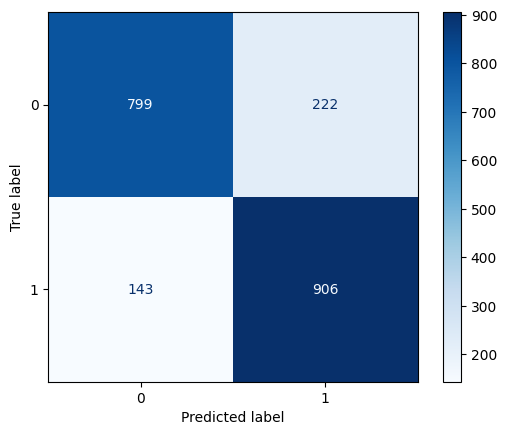

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test contains true labels and y_pred contains predicted labels
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Logistic Regression

In [ ]:
# Standardisasi
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression
lg_model = LogisticRegression(solver='lbfgs', max_iter=3000)
lg_model = lg_model.fit(X_train_scaled, y_train)

In [ ]:
# Evaluasi model Logistic Reg
y_pred_lr = lg_model.predict(X_test_scaled)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.8676328502415459
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1021
         Yes       0.89      0.84      0.87      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

Confusion Matrix:
 [[917 104]
 [170 879]]


## Random Forest

In [ ]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Evaluasi model Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label='Yes')
recall = recall_score(y_test, y_pred_rf, pos_label='Yes')
f1 = f1_score(y_test, y_pred_rf, pos_label='Yes')

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
🔹 Accuracy: 0.8628
🔹 Precision: 0.8883
🔹 Recall: 0.8341
🔹 F1 Score: 0.8604
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.89      0.87      1021
         Yes       0.89      0.83      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Confusion Matrix:
 [[911 110]
 [174 875]]


## Linear Regression

In [ ]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'PaperlessBilling', 'PaymentMethod', 'Churn']

# Pastikan kolom ada di DataFrame
categorical_features = [col for col in categorical_features if col in df.columns]

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_0.6931471805599453,Partner_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0.693147,0,29.85,29.85,True,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
1,5575-GNVDE,3.555348,1,56.95,1889.50,False,True,True,False,True,...,True,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,1.098612,0,53.85,108.15,False,True,True,False,True,...,True,False,False,False,True,False,False,False,True,True
3,7795-CFOCW,3.828641,1,42.30,1840.75,False,True,True,False,True,...,True,False,False,True,False,True,False,False,False,False
4,9237-HQITU,1.098612,0,70.70,151.65,True,False,True,False,True,...,True,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,3.218876,1,84.80,1990.50,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,False
7039,2234-XADUH,4.290459,1,103.20,7362.90,True,False,True,False,False,...,False,False,True,False,True,False,True,False,False,False
7040,4801-JZAZL,2.484907,0,29.60,346.45,True,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
7041,8361-LTMKD,1.609438,0,74.40,306.60,False,True,False,True,False,...,True,False,False,False,True,False,False,False,True,True


In [ ]:
# Memisahkan fitur dan label
X = df.drop(columns=["TotalCharges","customerID"])
# Ambil kolom TotalCharges sebagai target dan ubah menjadi numerik
y = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
# Hapus baris dengan target NaN
mask = y.notnull()
X = X[mask]
y = y[mask]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)

tenure                                     float64
Contract                                     int64
MonthlyCharges                             float64
gender_Female                                 bool
gender_Male                                   bool
SeniorCitizen_0.0                             bool
SeniorCitizen_0.6931471805599453              bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

In [ ]:
# Latih model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error (MSE): 906875.5700658823
Root Mean Squared Error (RMSE): 952.3001470470758
Mean Absolute Error (MAE): 765.4869698950134
R² Score: 0.8255784658536123


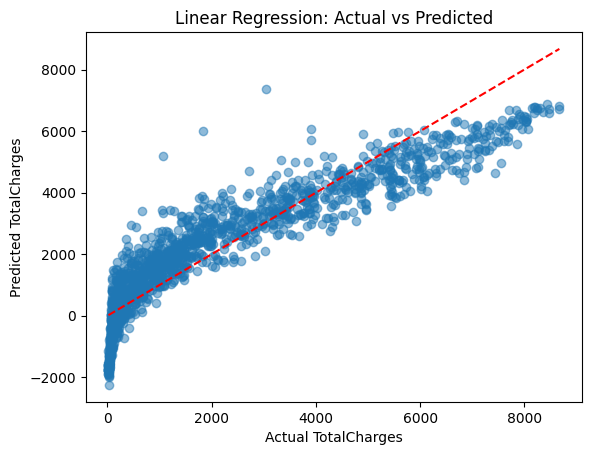

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual TotalCharges")
plt.ylabel("Predicted TotalCharges")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis y=x
plt.show()